In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load the CSV file
main_df=pd.read_csv("Resources/car_df.csv")

# Display sample data
main_df.head()

,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00000,6758.666667,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00000,6058.000000,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00000,4815.000000,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33333,5883.000000,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.66667,5582.666667,135.028,742.02088


In [3]:
# Round 'Car Retail Sales (New)' and 'Car Retail Sales (Used)' columns to two decimal places
main_df["Car Retail Sales (New)"] = main_df["Car Retail Sales (New)"].round(2)
main_df["Car Retail Sales (Used)"] = main_df["Car Retail Sales (Used)"].round(2)
main_df.head()


,observation_date,Number of Cars Sold,Number of Cars Made,PERCENT_CHANGE_FROM_YEAR_AGO(New Cars),PERCENT_CHANGE_FROM_YEAR_AGO(Used Cars),Average Amount Financed (New),Average Amount Financed (Used),Average Finance Rate (New),Average Finance Rate (Used),Car Retail Sales (New),Car Retail Sales (Used),cpi_newcar,motorlon_sec
0,2008-04-01,4913667,301000.0000,-1.23206,1.20084,23623.28,17095.87,5.74,10.63,52920.00,6758.67,134.677,798.13775
1,2008-07-01,4511667,342266.6667,-1.52817,-2.11933,24759.34,16963.08,5.56,10.62,48668.00,6058.00,134.160,801.67641
2,2008-10-01,3600000,271766.6667,-2.59555,-6.63470,24843.26,16947.01,5.62,10.33,37487.00,4815.00,132.497,777.27561
3,2009-01-01,2901000,132300.0000,-1.55901,-10.33253,25088.65,15980.77,5.71,10.37,37274.33,5883.00,133.317,755.68467
4,2009-04-01,3195333,149900.0000,0.26013,-10.12438,25657.32,16325.71,4.71,10.06,40983.67,5582.67,135.028,742.02088


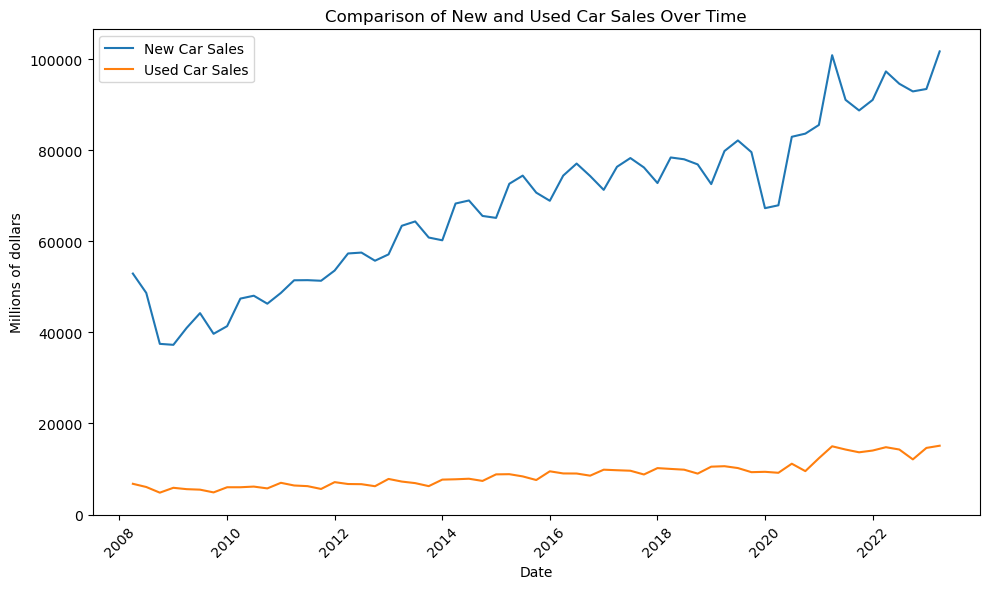

In [4]:
main_df["observation_date"] = pd.to_datetime(main_df["observation_date"])

# Plotting the line plot for used and new car sales over time
plt.figure(figsize=(10, 6)) 

plt.plot(main_df["observation_date"], main_df["Car Retail Sales (New)"], label="New Car Sales")
plt.plot(main_df["observation_date"], main_df["Car Retail Sales (Used)"], label="Used Car Sales")

plt.title("Comparison of New and Used Car Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Millions of dollars")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Filter the data for the first DataFrame (dates from 2008 to 2019)
df_precovid = main_df[(main_df["observation_date"].dt.year >= 2008) & (main_df["observation_date"].dt.year <= 2019)]
df_precovid = df_precovid[["observation_date", "Car Retail Sales (New)", "Car Retail Sales (Used)"]]
df_precovid.head()


,observation_date,Car Retail Sales (New),Car Retail Sales (Used)
0,2008-04-01,52920.00,6758.67
1,2008-07-01,48668.00,6058.00
2,2008-10-01,37487.00,4815.00
3,2009-01-01,37274.33,5883.00
4,2009-04-01,40983.67,5582.67


In [14]:
# Filter the data for the second DataFrame (dates from 2020 onwards)
df_postcovid = main_df[main_df["observation_date"].dt.year >= 2020]
df_postcovid = df_postcovid[["observation_date", "Car Retail Sales (New)", "Car Retail Sales (Used)"]]
df_postcovid.head()


,observation_date,Car Retail Sales (New),Car Retail Sales (Used)
47,2020-01-01,67281.67,9392.33
48,2020-04-01,67910.67,9176.67
49,2020-07-01,82953.00,11170.00
50,2020-10-01,83644.33,9542.67
51,2021-01-01,85548.00,12376.00


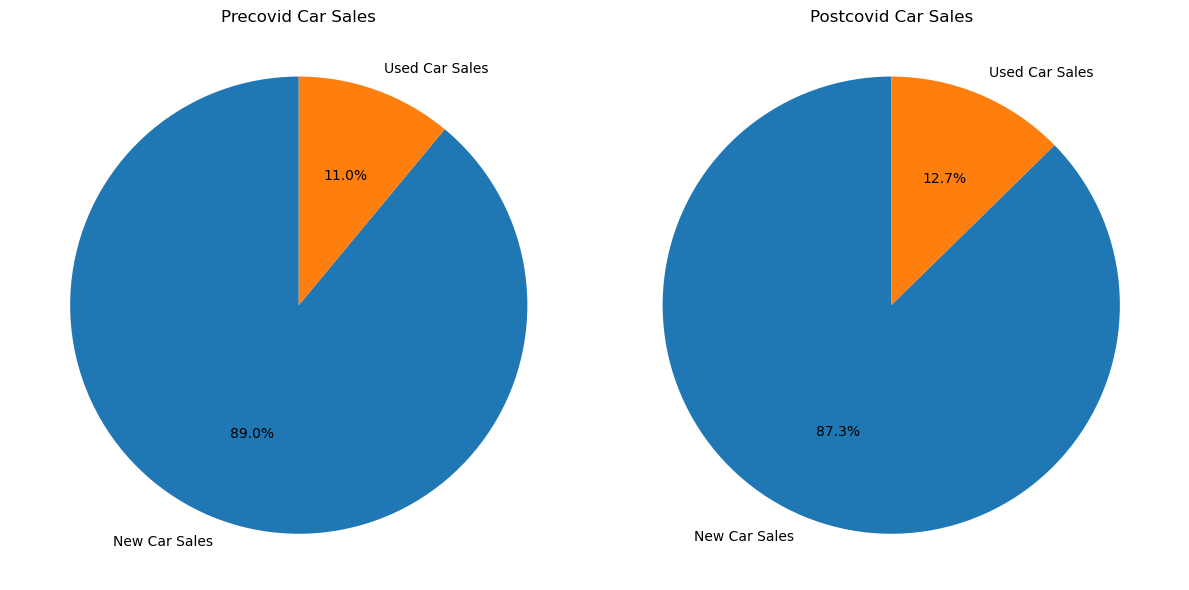

In [22]:
# Calculate the total sales for new and used cars for precovid period
total_new_precovid = df_precovid["Car Retail Sales (New)"].sum()
total_used_precovid = df_precovid["Car Retail Sales (Used)"].sum()

# Data for pie chart
labels_precovid = "New Car Sales", "Used Car Sales"
sizes_precovid = [total_new_precovid, total_used_precovid]

# Pie chart for precovid sales
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(sizes_precovid, labels=labels_precovid, autopct='%1.1f%%', startangle=90)
axs[0].axis("equal")
axs[0].set_title("Precovid Car Sales")

# Calculate the total sales for new and used cars for postcovid period
total_new_postcovid = df_postcovid["Car Retail Sales (New)"].sum()
total_used_postcovid = df_postcovid["Car Retail Sales (Used)"].sum()

# Data for pie chart
labels_postcovid = 'New Car Sales', 'Used Car Sales'
sizes_postcovid = [total_new_postcovid, total_used_postcovid]

# Pie chart for postcovid sales
axs[1].pie(sizes_postcovid, labels=labels_postcovid, autopct='%1.1f%%', startangle=90)
axs[1].axis("equal") 
axs[1].set_title("Postcovid Car Sales")

plt.tight_layout()
plt.show()

Precovid Period (2008-2019):

- New Car Sales: Showed a consistent trend over the years with a predominant market share compared to used cars.
- Used Car Sales: Also exhibited steady sales but consistently lower than new car sales.
- The pie chart illustrated that the majority of car sales during this period were attributed to new cars.

Postcovid Period (2020-Onwards):

- New Car Sales: Saw fluctuations, possibly due to the impact of the pandemic on the automotive market, resulting in varying sales volumes.
- Used Car Sales: Displayed a fluctuating pattern as well, potentially influenced by market shifts and changing consumer preferences during and after the pandemic.
- The pie chart might indicate shifts in consumer behavior or market dynamics.

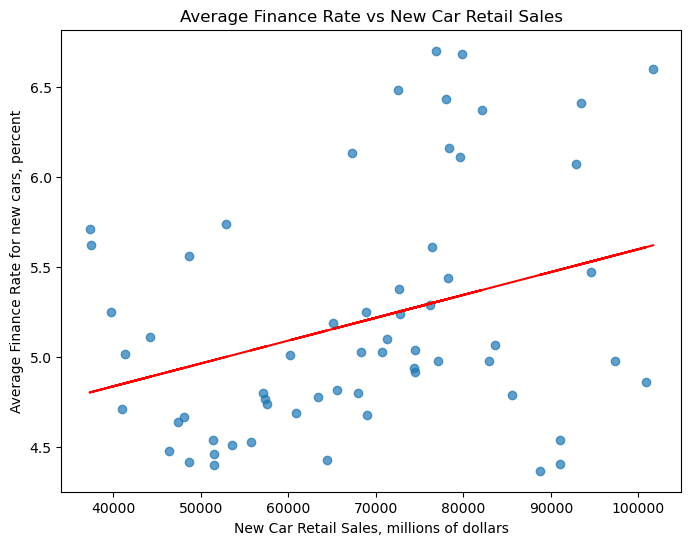

P-value: 0.0105
The correlation between Average Finance Rate and New Car Retail Sales is: 0.3256


In [34]:
from scipy.stats import linregress
# Extracting the variables for the scatter plot and regression analysis
y = main_df["Average Finance Rate (New)"]
x = main_df["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for new cars, percent")
plt.title("Average Finance Rate vs New Car Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = main_df["Average Finance Rate (New)"].corr(main_df["Car Retail Sales (New)"])
print(f"The correlation between Average Finance Rate and New Car Retail Sales is: {correlation:.4f}")



The scatter plot and regression line suggest a moderate positive linear relationship between rate and sales. A low p-value suggests that the relationship is statistically significant. A correlation coefficient of 0.3256 indicates a moderately positive linear relationship between the two variables.

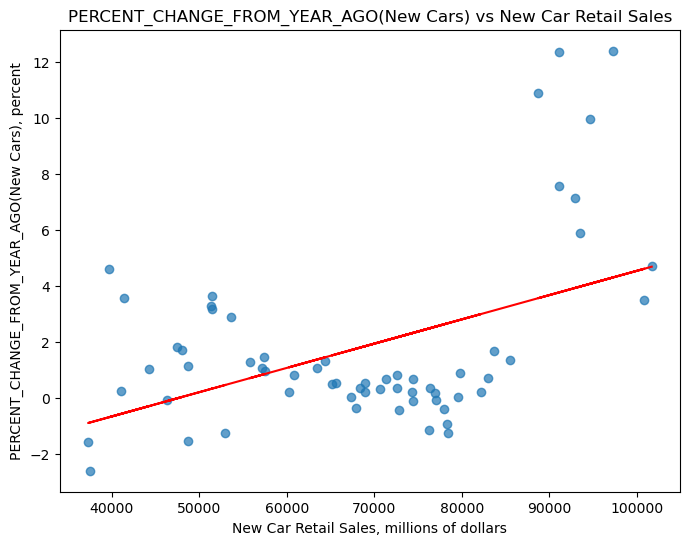

P-value: 0.0002
The correlation between PERCENT_CHANGE_FROM_YEAR_AGO(New Cars) and New Car Retail Sales is: 0.4537


In [35]:
y = main_df["PERCENT_CHANGE_FROM_YEAR_AGO(New Cars)"]
x = main_df["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("PERCENT_CHANGE_FROM_YEAR_AGO(New Cars), percent")
plt.title("PERCENT_CHANGE_FROM_YEAR_AGO(New Cars) vs New Car Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = main_df["PERCENT_CHANGE_FROM_YEAR_AGO(New Cars)"].corr(main_df["Car Retail Sales (New)"])
print(f"The correlation between PERCENT_CHANGE_FROM_YEAR_AGO(New Cars) and New Car Retail Sales is: {correlation:.4f}")

A correlation of 0.4537 suggests a moderately strong positive linear relationship. The low p-value indicates that the observed correlation of 0.4537 is statistically significant. The combination of a moderately strong positive correlation (0.4537) and a low p-value (0.0002) suggests that there is a statistically significant relationship.

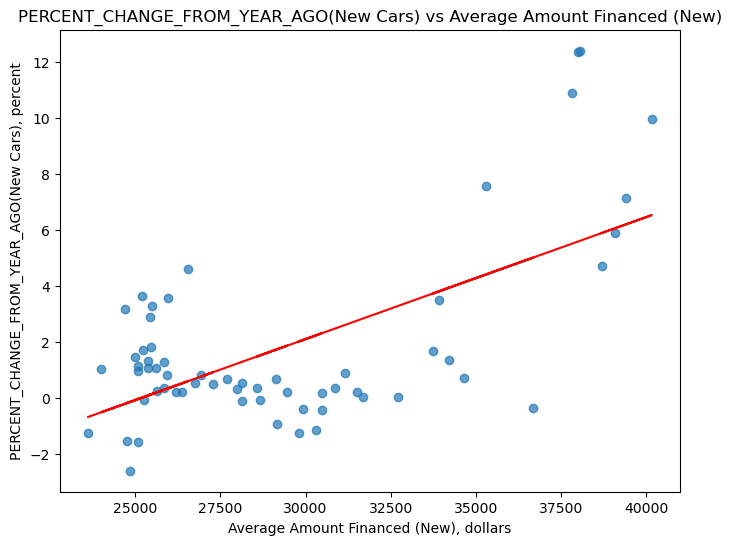

P-value: 0.0000
The correlation between PERCENT_CHANGE_FROM_YEAR_AGO(New Cars) and Average Amount Financed (New) is: 0.6235


In [36]:
y = main_df["PERCENT_CHANGE_FROM_YEAR_AGO(New Cars)"]
x = main_df["Average Amount Financed (New)"]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Average Amount Financed (New), dollars")
plt.ylabel("PERCENT_CHANGE_FROM_YEAR_AGO(New Cars), percent")
plt.title("PERCENT_CHANGE_FROM_YEAR_AGO(New Cars) vs Average Amount Financed (New)")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = main_df["PERCENT_CHANGE_FROM_YEAR_AGO(New Cars)"].corr(main_df["Average Amount Financed (New)"])
print(f"The correlation between PERCENT_CHANGE_FROM_YEAR_AGO(New Cars) and Average Amount Financed (New) is: {correlation:.4f}")

In [ ]:
y = main_df["Average Finance Rate (New)"]
x = main_df["Car Retail Sales (New)"]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("New Car Retail Sales, millions of dollars")
plt.ylabel("Average Finance Rate for new cars, percent")
plt.title("Average Finance Rate vs New Car Retail Sales")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plotting the regression line
plt.plot(x, slope * x + intercept, color="red")

plt.show()

print(f"P-value: {p_value:.4f}")
correlation = main_df["Average Finance Rate (New)"].corr(main_df["Car Retail Sales (New)"])
print(f"The correlation between Average Finance Rate and New Car Retail Sales is: {correlation:.4f}")